<h1>App Physics 155 - LE 2</h1>
<h2>Kenneth V. Domingo<br />
2015-03116</h2>

<b>Problem 2.1: Quantum uncertainty in the harmonic oscillator</b>

In units where all the constants are 1, the wavefunction of the $n$th energy level of the onedimensional quantum harmonic oscillator - i.e., a spinless point particle in a quadratic potential well - is given by

\begin{equation}
    \psi_n(x) = \frac{1}{\sqrt{2^n n!\sqrt{\pi}}}e^{-\frac{x^2}{2}}H_n(x)
\end{equation}

for $n = 0 ... \infty$, where $H_n(x)$ is the $n$th Hermite polynomial. Hermite polynomials satisfy a relation somewhat similar to that for the Fibonacci numbers, although more complex:

\begin{equation}
    H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x)
\end{equation}

The first two Hermite polynomials are $H_0(x) = 1$ and $H_1(x) = 2x$.

a) Write a user-defined function $H(n,x)$ that calculates $H_n(x)$ for given $x$ and any integer $n \leq 0$. Use your function to make a plot that shows the harmonic oscillator wavefunctions for $n = 0, 1, 2, 3$, all on the same graph, in the range $x = −4$ to $x = 4$. Hint: There is a function factorial in the math package that calculates the factorial of an integer.

b) Make a separate plot of the wavefunction for $n = 30$ from $x = −10$ to $x = 10$. Hint: If your program takes too long to run in this case, then you’re doing the calculation wrong — the program should take only a second or so to run.

c) The quantum uncertainty of a particle in the $n$th level of a quantum harmonic oscillator can be quantified by its root-mean-square position $\sqrt{\langle x^2\rangle}$, where

\begin{equation}
    \langle x^2 \rangle = \int_{-\infty}^{\infty} x^2 |\psi_n(x)|^2 dx
\end{equation}

Write a program that evaluates this integral using Gaussian quadrature on 100 points and then calculates the uncertainty (i.e., the root-mean-square position of the particle) for a given value of $n$. Use your program to calculate the uncertainty for $n = 5$. You should get an answer in the vicinity of $\sqrt{\langle x^2 \rangle} = 2.3$.

In [1]:
import numpy as np
import matplotlib.pyplot as mp
from math import factorial
from gaussxw import *
%matplotlib inline

In [158]:
def H(n,x):
    H = [1, 2*x]
    for i in range(2,n+1):
        H.append(2*x*H[i-1] - 2*(i-1)*H[i-2])
    if n == 0:
        return H[0]
    elif n == 1:
        return H[1]
    else:
        return H[-1]

def psi(n,x):
    return 1/np.sqrt(2**n*factorial(n)*np.sqrt(np.pi))*np.exp(-x**2/2)*H(n,x)

In [159]:
psi(1,1)

0.64428836511347509

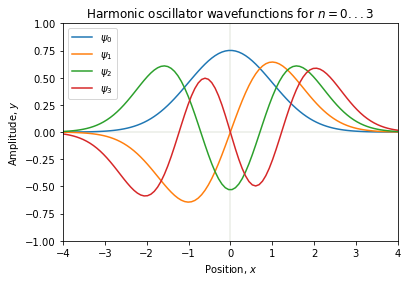

In [172]:
x = np.linspace(-4,4,100)
mp.plot(x,x*0, color="#eaede7")
mp.plot(x*0,x, color="#eaede7")
for n in range(0,4):
    mp.plot(x, psi(n,x), label="$\psi_{%i}$" %(n))

mp.title("Harmonic oscillator wavefunctions for $n = 0...3$")
mp.xlabel("Position, $x$")
mp.ylabel("Amplitude, $y$")
mp.xlim(-4,4)
mp.ylim(-1,1)
mp.legend()
mp.show()

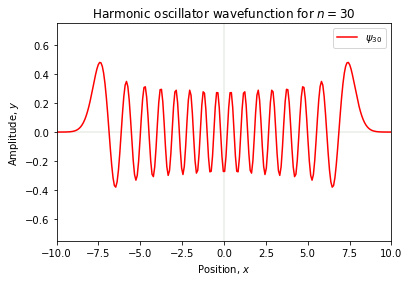

In [164]:
x = np.linspace(-10,10,250)
mp.plot(x,x*0, color="#eaede7")
mp.plot(x*0,x, color="#eaede7")
mp.plot(x, psi(30,x), label="$\psi_{30}$", color="red")

mp.title("Harmonic oscillator wavefunction for $n=30$")
mp.xlabel("Position, $x$")
mp.ylabel("Amplitude, $y$")
mp.xlim(-10,10)
mp.ylim(-.75,.75)
mp.legend()
mp.show()

In [186]:
uncertainty = lambda n,x: x*x*psi(n,x)**2
N = 100
x,w = gaussxw(N)
n = 5
a = -np.pi/2
b = np.pi/2
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w
y = uncertainty(n,np.tan(xp))/cos(xp)**2
s = sum(y*wp)
print("Uncertainty for n = 5 :", np.sqrt(s))

Uncertainty for n = 5 : 2.34520787978
